In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/metabric-clinic-genetic-values/METABRIC_RNA_Mutation_f.csv


In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## The idea of this markdown is understand how to create a Venn Diagram in a few steps. In this case, I'll use it to classify different treatments in a Breast Cancer dataset.

In [3]:
metabric = pd.read_csv('/kaggle/input/metabric-clinic-genetic-values/METABRIC_RNA_Mutation_f.csv', sep=';')
metabric.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,cancer_subtype,cohort,er_status_measured_by_ihc,...,ccne1,cdk2,mdm2,ki67,mmp9,pik3ca,pik3r1,tgfb3,bbc3,apc
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,-13.388,-0.6208,0.3126,29.336,-23.771,-0.7545,20.932,-14.828,-0.2122,0.5815
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,-0.6273,0.1813,0.8803,-0.4866,-13.469,-0.6025,-0.3072,0.4945,-0.3817,13.903
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,-0.1245,-0.1109,-0.8822,0.4321,-0.1297,22.172,17.297,11.768,-0.0325,15.604
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,-0.6651,-14.457,0.2551,-0.5447,-0.7623,35.439.999.999.999.900,-0.6674,10.085,25.351,16.567
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,-10.514,15.423,-0.0063,-0.1758,-0.7551,-0.43200000000000005,-11.464,-0.9729,-0.9266,0.3155


In [4]:
import seaborn as sns
from collections import Counter
from matplotlib_venn import venn2, venn3

#### Before starting with the dataset, It's better to have a quick example with a few values before moving to the next level. At first, we have a list called `value` and our goal is to have three differents sets A,B, and C.

In [5]:
value=[1,2,3,4,5,6,7]

#### In the Venn's Diagram is important the order of the values, based on the previous list, we get the following:

A=1,B=2,A ∩ B=3, C=4, A∩C =5, B∩C =6, A∩B∩C = 7

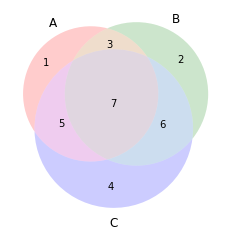

In [6]:
venn3(subsets=value, set_labels=("A", "B ", "C"),  alpha=0.2)

#### Let's apply to a dataframe

In many cases, patients could receive combine treatments, for that reason a Venn Diagram will help to have a better approach than the individual plots.
<br>
Before starting the treatments are boolean features, that's why the values are taking as 0 and 1.
<br>
The first step, is to created the possible combinations, for example the variable `chemo` will be the result of `chemotherapy` = 1 , `radio_therapy`= 0 y `hormone_therapy` = 0.
This step applies for each therapy, and then the possible combinations between them.

In [7]:
chemo = metabric[(metabric["chemotherapy"]==1) & (metabric["radio_therapy"]==0) & (metabric["hormone_therapy"]==0)]
radio = metabric[(metabric["chemotherapy"]==0) & (metabric["radio_therapy"]==1) & (metabric["hormone_therapy"]==0)]
hormonal = metabric[(metabric["chemotherapy"]==0) & (metabric["radio_therapy"]==0) & (metabric["hormone_therapy"]==1)]
chemo_radio = metabric[((metabric["chemotherapy"]==1) & (metabric["radio_therapy"]==1)) & (metabric["hormone_therapy"]==0)]
radio_hormonal = metabric[(metabric["chemotherapy"]==0) & ((metabric["radio_therapy"]==1) & (metabric["hormone_therapy"]==1))]
hormonal_chemo = metabric[((metabric["chemotherapy"]==1) & (metabric["hormone_therapy"]==1)) & (metabric["radio_therapy"]==0) ]
all_3 = metabric[((metabric["chemotherapy"]==1) & (metabric["radio_therapy"]==1) & (metabric["hormone_therapy"]==1))]

In [8]:
tratamientos = [chemo, radio, chemo_radio,hormonal, hormonal_chemo, radio_hormonal,all_3]

sizes=[]
proportiondeath=[]

for i in tratamientos:
    sizes.append(np.shape(i)[0])

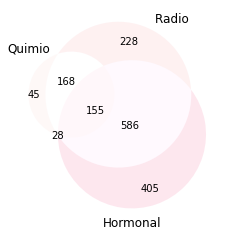

In [9]:
sequential_colors = sns.color_palette("RdPu", 6)
venn3(subsets=sizes, set_labels=("Quimio", "Radio ", "Hormonal"),  alpha=0.2, set_colors= sequential_colors)

<u>Insights:</u>

* The therapy most used is hormonetherapy with 405 patients.
* Radio and Hormone therapy is the combination most used for 586 patients.
* La combinación de terapia más empleada es Radio y Hormono terapia con 586 pacientes.
* The least used is hormone and chemo therapy together with 28 patients.
* All the therapies together apply to 155 patients.

#### I hope it might be helpful and any suggestions are welcome  😊😊